First, we need to load all packages and data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import csv
mydata = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

Now let's take a look at the dataset

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Here we can see that data contains 16719 observations, but it has also missing data. For example Critic_Score and Critic_Count has only 8137 obs. We can make some visualisation with it, but in future they should be removed.

Let's look at the titles which are available for more than one platform

In [21]:
multiple_platform_title = mydata.groupby('Name').agg({'Name':lambda x : len(x) if (len(x) > 1) else None}).dropna()
multiple_platform_title.Name = multiple_platform_title.Name.astype(np.int64)
multiple_platform_title = multiple_platform_title.sort_values(['Name'], ascending=False)
multiple_platform_title.columns = ['Platform_count']
multiple_platform_title

/Users/r_kamalov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'Name' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,Platform_count
Name,
Need for Speed: Most Wanted,12
Madden NFL 07,9
LEGO Marvel Super Heroes,9
FIFA 14,9
Ratatouille,9
Terraria,8
Angry Birds Star Wars,8
LEGO Jurassic World,8
Lego Batman 3: Beyond Gotham,8


Release of the same game on 12 platforms looks weird

In [22]:
cols = ['Name','Platform','Year_of_Release','Publisher']
mydata.loc[mydata.Name=='Need for Speed: Most Wanted', cols].sort_values(['Year_of_Release'])

,Name,Platform,Year_of_Release,Publisher
253,Need for Speed: Most Wanted,PS2,2005.0,Electronic Arts
1591,Need for Speed: Most Wanted,X360,2005.0,Electronic Arts
1998,Need for Speed: Most Wanted,XB,2005.0,Electronic Arts
3581,Need for Speed: Most Wanted,GC,2005.0,Electronic Arts
5973,Need for Speed: Most Wanted,PC,2005.0,Electronic Arts
6411,Need for Speed: Most Wanted,DS,2005.0,Electronic Arts
6474,Need for Speed: Most Wanted,GBA,2005.0,Electronic Arts
523,Need for Speed: Most Wanted,PS3,2012.0,Electronic Arts
1190,Need for Speed: Most Wanted,X360,2012.0,Electronic Arts
2048,Need for Speed: Most Wanted,PSV,2012.0,Electronic Arts


Looks like there are several games with one name appears in this data. Now the overall distribution of the releases by platform

Text(0,0.5,'Platform')

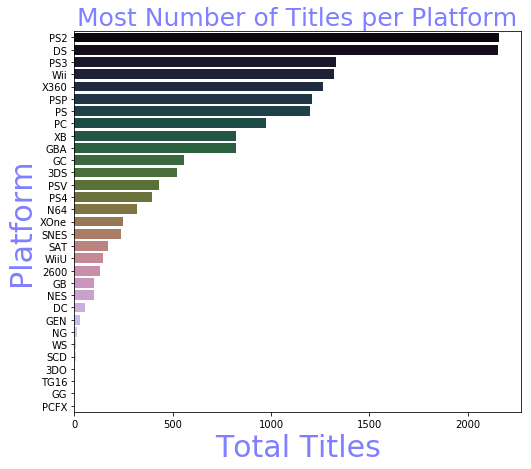

In [37]:
platform_title = mydata.Platform.value_counts()

plt.subplots(figsize=(8,7))
ax = sns.barplot(x=platform_title , y=platform_title .index, palette='cubehelix')
ax.set_title('Most Number of Titles per Platform', color='blue', alpha=0.5, size=25)
ax.set_xlabel('Total Titles', color='blue', alpha=0.5, size=30)
ax.set_ylabel('Platform', color='blue', alpha=0.5, size=30)

A little bit more simple visualization

Text(0,0.5,'Total Global Sales')

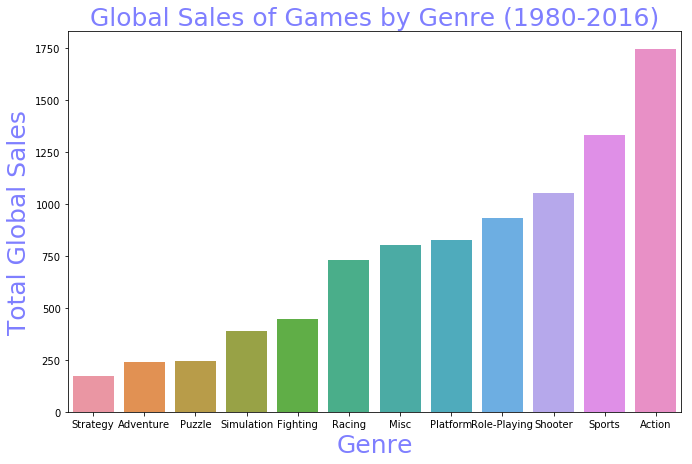

In [36]:
global_sales_by_genre = mydata.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values('Global_Sales')
plt.subplots(figsize=(11,7))
ax = sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.Global_Sales)
ax.set_title('Global Sales of Games by Genre (1980-2016)', color='blue', size=25, alpha=0.5)
ax.set_xlabel('Genre', color='blue', size=25, alpha=0.5)
ax.set_ylabel('Total Global Sales', color='blue', size=25, alpha=0.5)

Text(0,0.5,'Number of Titles')

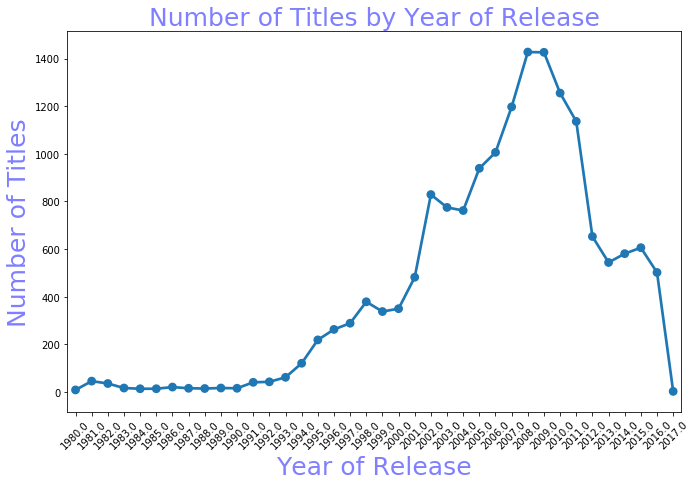

In [35]:
titles_by_year = mydata.groupby(['Year_of_Release']).agg({'Name':lambda x : len(x) if (len(x) > 1) else None}).dropna()
plt.subplots(figsize=(11,7))
ax = sns.pointplot(x=titles_by_year.index, y=titles_by_year.Name)
g = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Number of Titles by Year of Release', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Year of Release', size=25, color='blue', alpha=0.5)
ax.set_ylabel('Number of Titles', size=25, color='blue', alpha=0.5)

Text(0,0.5,'Sales')

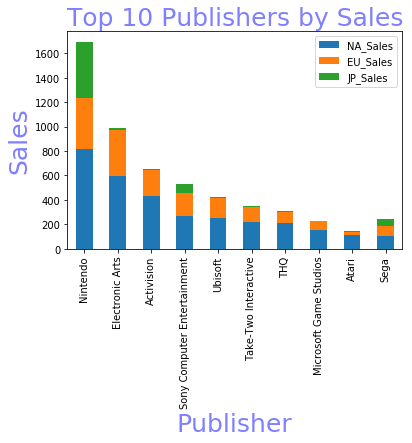

In [34]:
global_sales_publisher = mydata.pivot_table(index=['Publisher'], values=['NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['NA_Sales'], ascending=False)
global_sales_publisher = global_sales_publisher[['NA_Sales','EU_Sales','JP_Sales']]
ax = global_sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False)
ax.set_title('Top 10 Publishers by Sales', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='blue', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='blue', alpha=0.5)

Need to check correlations. First, need to convert categorical columns into numerical codes

In [39]:
cols = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
for col in cols:
    uniques = mydata[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        mydata.loc[mydata[col] == k, col] = v

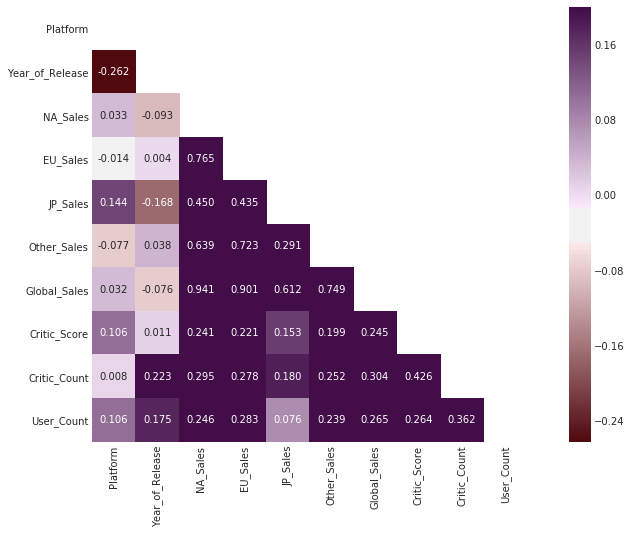

In [42]:
mask = np.zeros_like(mydata.corr())
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(730, 300, sep=20, as_cmap=True, s=85, l=15, n=20)
with sns.axes_style("white"):
    fig, ax = plt.subplots(1,1, figsize=(15,8))
    ax = sns.heatmap(mydata.corr(), mask=mask, vmax=0.2, square=True, annot=True, fmt=".3f", cmap=cmap)


Critic scores to global sales

[(0, 17.5)]

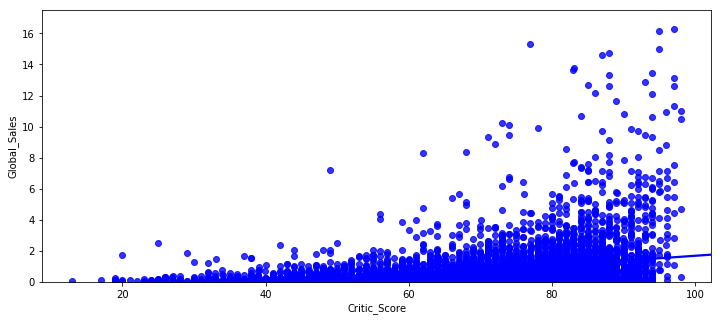

In [48]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=mydata, ci=None, color="blue", x_jitter=.02).set(ylim=(0, 17.5))

Now lets try to build a model and deal with missing values. I'll try to predict: will game became a hit based on global sales and critic scores

In [59]:
data2 = mydata[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
data2 = mydata.dropna().reset_index(drop=True)
data2 = mydata[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
import sys

/Users/r_kamalov/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/r_kamalov/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/r_kamalov/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: overflow encountered in true_divide
  endog_mu = self._clean(endog / mu)


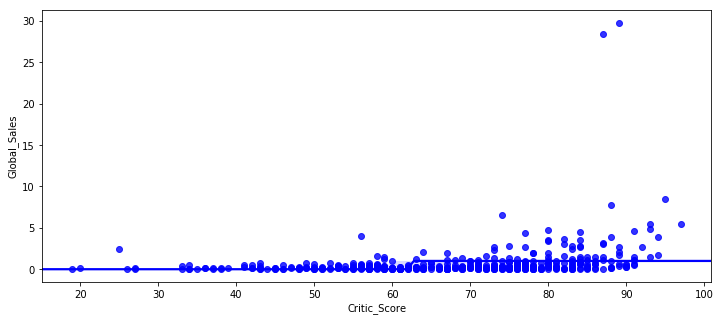

In [62]:
from math import ceil
n = ceil(0.05 * len(data2['Global_Sales']))
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=data2.sample(n=n),
            logistic=True, n_boot=500, y_jitter=.04, color="blue")